In [1]:
import os
import time

import sys
sys.path.append('..') # to import local EnhancedDataSynthesizer version

import matplotlib.pyplot as plt
plt.style.use('classic')

from DataSynthesizer.DataDescriber import DataDescriber
from DataSynthesizer.DataGenerator import DataGenerator
from DataSynthesizer.lib.utils import display_bayesian_network

from DataSynthesizer.lib.utils import mutual_information

import numpy as np
import pandas as pd
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

file_path=os.getcwd() 
traindata = os.path.join(file_path+'/data/',"adult_complete.csv")

data=traindata
diff=0
k=2 
sensi='relationship'
target='income'


In [2]:
output_dir = 'out/correlated_attribute_mode_ga/'

description_file_ga = os.path.join(file_path, output_dir, "ga_corrmeta.json")

if sensi:
    synthetic_data = os.path.join(file_path, output_dir, "DSv_custom_"+str(k)+"_syntraindata.csv")
else:
    synthetic_data = os.path.join(file_path, output_dir, "DSv_"+str(k)+"_syntraindata.csv")

input_df = pd.read_csv(data, skipinitialspace=True)
# An attribute is categorical if its domain size is less than this threshold.
# Here modify the threshold to adapt to the domain size of "education" (which is 14 in input dataset).
threshold_value = 20

# Specify categorical attributes
categorical_attributes = {'workclass': True, 'education-num': True, 'marital-status': True, 'occupation': True, 'relationship': True,
                          'race': True, 'sex': True, 'native-country': True, 'income': True}

# Specify which attributes are candidate keys of input dataset.
candidate_keys = {}

# A parameter in Differential Privacy. It roughly means that changing a row in the input dataset will not
# change the probability of getting the same output more than a multiplicative difference of exp(epsilon).
# Increase epsilon value to reduce the injected noises. Set epsilon=0 to turn off differential privacy.
epsilon = diff

# The maximum number of parents in Bayesian network, i.e., the maximum number of incoming edges.
degree_of_bayesian_network = k

# Number of tuples generated in synthetic dataset.
num_tuples_to_generate = len(input_df)

start=time.time()

#Data Describer:
describer_ga = DataDescriber(category_threshold=threshold_value)
describer_ga.describe_dataset_in_correlated_attribute_mode_ga(dataset_file=data,
#describer_ga.describe_dataset_in_correlated_attribute_mode(dataset_file=data,
                                                    epsilon=epsilon,
                                                    k=degree_of_bayesian_network,
                                                    attribute_to_is_categorical=categorical_attributes,
                                                    attribute_to_is_candidate_key=candidate_keys,
                                                    source_genes=10,
                                                    genepool_size=200,
                                                    epochs=400,
                                                    sensi=sensi,
                                                    target=target
                                                    )

describer_ga.save_dataset_description_to_file(description_file_ga)
print("Wrote network to " + description_file_ga)

end=time.time()
bn_time=end-start
print("Runtime Data Description:", bn_time)

network=describer_ga.bayesian_network

fitness = 0
for (c, ps) in network:
        for p in ps:
            fitness += mutual_information(input_df[c], input_df[[p]])
print("Fitness:", fitness)

display_bayesian_network(describer_ga.bayesian_network)
start=time.time()

Epoch 1/400
(1.5122177246103925, [[12, 5, 0, 1, 10, 4, 11, 7, 6, 2, 3, 8, 9], [12, 5], [0, 5], [4, 10], [0, 10], [1, 0], [12, 7], [1, 11], [11, 1], [1, 0], [7, 8], [12, 0], [4, 1], [1, 6]])
-----

Epoch 2/400
(1.5558547113124974, [[12, 5, 3, 0, 4, 11, 7, 10, 9, 6, 2, 1, 8], [12, 3], [4, 3], [7, 12], [12, 5], [12, 0], [12, 10], [9, 0], [4, 3], [6, 0], [12, 0], [0, 4], [12, 5], [11, 10]])
-----

Epoch 3/400
(1.6644227082907501, [[12, 5, 3, 0, 4, 11, 7, 10, 9, 6, 2, 1, 8], [5, 3], [4, 3], [4, 11], [5, 12], [3, 0], [12, 7], [4, 11], [11, 3], [1, 0], [7, 0], [3, 0], [4, 3], [1, 6]])
-----

Epoch 4/400
(1.8017535305171068, [[12, 5, 3, 0, 4, 11, 7, 10, 9, 6, 2, 8, 1], [12, 3], [4, 3], [4, 12], [12, 5], [12, 5], [12, 10], [4, 11], [4, 3], [6, 0], [12, 11], [0, 4], [12, 5], [11, 10]])
-----

Epoch 5/400
(1.8743303550890045, [[12, 5, 3, 0, 4, 11, 7, 10, 9, 6, 1, 8, 2], [12, 3], [4, 3], [4, 12], [12, 5], [12, 0], [12, 10], [4, 11], [4, 3], [6, 0], [12, 11], [0, 4], [12, 5], [11, 10]])
-----

Epoc

Epoch 44/400
(2.029085552259245, [[12, 5, 3, 0, 4, 11, 10, 9, 7, 8, 6, 2, 1], [12, 3], [4, 0], [4, 0], [12, 5], [12, 0], [12, 10], [3, 11], [4, 3], [12, 3], [12, 3], [0, 4], [0, 4], [11, 10]])
-----

Epoch 45/400
(2.029085552259245, [[12, 5, 3, 0, 4, 11, 10, 9, 7, 8, 6, 2, 1], [12, 3], [4, 0], [4, 0], [12, 5], [12, 0], [12, 10], [3, 11], [4, 3], [12, 3], [12, 3], [0, 4], [0, 4], [11, 10]])
-----

Epoch 46/400
(2.029085552259245, [[12, 5, 3, 0, 4, 11, 10, 9, 7, 8, 6, 2, 1], [12, 3], [4, 0], [4, 0], [12, 5], [12, 0], [12, 10], [3, 11], [4, 3], [12, 3], [12, 3], [0, 4], [0, 4], [11, 10]])
-----

Epoch 47/400
(2.029085552259245, [[12, 5, 3, 0, 4, 11, 10, 9, 7, 8, 6, 2, 1], [12, 3], [4, 0], [4, 0], [12, 5], [12, 0], [12, 10], [3, 11], [4, 3], [12, 3], [12, 3], [0, 4], [0, 4], [11, 10]])
-----

Epoch 48/400
(2.029085552259245, [[12, 5, 3, 0, 4, 11, 10, 9, 7, 8, 6, 2, 1], [12, 3], [4, 0], [4, 0], [12, 5], [12, 0], [12, 10], [3, 11], [4, 3], [12, 3], [12, 3], [0, 4], [0, 4], [11, 10]])
-----



Epoch 99/400
(2.0290855522592453, [[12, 5, 3, 0, 4, 11, 10, 8, 6, 9, 7, 1, 2], [12, 3], [4, 0], [4, 0], [12, 5], [12, 0], [12, 10], [3, 11], [4, 3], [12, 3], [12, 3], [0, 4], [0, 4], [11, 10]])
-----

Epoch 100/400
(2.0290855522592453, [[12, 5, 3, 0, 4, 11, 10, 8, 6, 9, 7, 1, 2], [12, 3], [4, 0], [4, 0], [12, 5], [12, 0], [12, 10], [3, 11], [4, 3], [12, 3], [12, 3], [0, 4], [0, 4], [11, 10]])
-----

Epoch 101/400
(2.0290855522592453, [[12, 5, 3, 0, 8, 4, 10, 11, 6, 9, 1, 7, 2], [12, 3], [4, 0], [4, 0], [12, 5], [12, 0], [12, 10], [3, 11], [4, 3], [12, 3], [12, 3], [0, 4], [0, 4], [11, 10]])
-----

Epoch 102/400
(2.0290855522592453, [[12, 5, 3, 0, 8, 4, 10, 11, 6, 9, 1, 7, 2], [12, 3], [4, 0], [4, 0], [12, 5], [12, 0], [12, 10], [3, 11], [4, 3], [12, 3], [12, 3], [0, 4], [0, 4], [11, 10]])
-----

Epoch 103/400
(2.0290855522592453, [[12, 5, 3, 8, 0, 4, 10, 11, 6, 9, 1, 7, 2], [12, 3], [4, 0], [4, 0], [12, 5], [12, 0], [12, 10], [3, 11], [4, 3], [12, 3], [12, 3], [0, 4], [0, 4], [11, 10]]

Epoch 146/400
(2.0666021041436244, [[12, 5, 3, 9, 0, 4, 2, 11, 8, 10, 6, 1, 7], [12, 3], [4, 0], [4, 0], [12, 5], [12, 0], [12, 10], [3, 11], [4, 3], [12, 3], [12, 3], [0, 4], [2, 4], [11, 10]])
-----

Epoch 147/400
(2.0666021041436244, [[12, 5, 3, 9, 0, 4, 2, 11, 10, 8, 6, 1, 7], [12, 3], [4, 0], [4, 0], [12, 5], [12, 0], [12, 10], [3, 11], [4, 3], [12, 3], [12, 3], [0, 4], [2, 4], [11, 10]])
-----

Epoch 148/400
(2.0666021041436244, [[12, 5, 3, 9, 0, 4, 2, 11, 10, 8, 6, 1, 7], [12, 3], [4, 0], [4, 0], [12, 5], [12, 0], [12, 10], [3, 11], [4, 3], [12, 3], [12, 3], [0, 4], [2, 4], [11, 10]])
-----

Epoch 149/400
(2.0666021041436244, [[12, 5, 3, 9, 0, 4, 2, 11, 10, 8, 6, 1, 7], [12, 3], [4, 0], [4, 0], [12, 5], [12, 0], [12, 10], [3, 11], [4, 3], [12, 3], [12, 3], [0, 4], [2, 4], [11, 10]])
-----

Epoch 150/400
(2.0666021041436244, [[12, 5, 3, 9, 0, 4, 2, 11, 10, 8, 6, 1, 7], [12, 3], [4, 0], [4, 0], [12, 5], [12, 0], [12, 10], [3, 11], [4, 3], [12, 3], [12, 3], [0, 4], [2, 4], [11, 10]

Epoch 187/400
(2.0666021041436244, [[12, 5, 9, 3, 0, 4, 2, 11, 10, 8, 6, 1, 7], [12, 3], [4, 0], [4, 0], [12, 9], [12, 0], [12, 10], [3, 11], [4, 3], [12, 3], [12, 5], [0, 4], [2, 4], [11, 10]])
-----

Epoch 188/400
(2.0666021041436244, [[12, 5, 9, 3, 0, 4, 2, 11, 10, 8, 6, 1, 7], [12, 3], [4, 0], [4, 0], [12, 9], [12, 0], [12, 10], [3, 11], [4, 3], [12, 3], [12, 5], [0, 4], [2, 4], [11, 10]])
-----

Epoch 189/400
(2.0666021041436244, [[12, 5, 9, 3, 0, 4, 2, 11, 10, 8, 6, 1, 7], [12, 3], [4, 0], [4, 0], [12, 9], [12, 0], [12, 10], [3, 11], [4, 3], [12, 3], [12, 5], [0, 4], [2, 4], [11, 10]])
-----

Epoch 190/400
(2.0666021041436244, [[12, 5, 9, 3, 0, 4, 2, 11, 10, 8, 6, 1, 7], [12, 3], [4, 0], [4, 0], [12, 9], [12, 0], [12, 10], [3, 11], [4, 3], [12, 3], [12, 5], [0, 4], [2, 4], [11, 10]])
-----

Epoch 191/400
(2.0666021041436244, [[12, 5, 9, 3, 0, 4, 2, 11, 10, 8, 6, 1, 7], [12, 3], [4, 0], [4, 0], [12, 9], [12, 0], [12, 10], [3, 11], [4, 3], [12, 3], [12, 5], [0, 4], [2, 4], [11, 10]

Epoch 237/400
(2.0666021041436244, [[12, 5, 9, 3, 0, 4, 2, 11, 10, 8, 6, 1, 7], [12, 3], [4, 0], [4, 0], [12, 9], [12, 0], [12, 10], [3, 11], [4, 3], [12, 3], [12, 5], [0, 4], [2, 4], [11, 10]])
-----

Epoch 238/400
(2.0666021041436244, [[12, 5, 9, 3, 0, 4, 2, 11, 10, 8, 6, 1, 7], [12, 3], [4, 0], [4, 0], [12, 9], [12, 0], [12, 10], [3, 11], [4, 3], [12, 3], [12, 5], [0, 4], [2, 4], [11, 10]])
-----

Epoch 239/400
(2.0666021041436244, [[12, 5, 9, 3, 0, 4, 2, 11, 10, 8, 6, 1, 7], [12, 3], [4, 0], [4, 0], [12, 9], [12, 0], [12, 10], [3, 11], [4, 3], [12, 3], [12, 5], [0, 4], [2, 4], [11, 10]])
-----

Epoch 240/400
(2.0666021041436244, [[12, 5, 9, 3, 0, 4, 2, 11, 10, 8, 6, 1, 7], [12, 3], [4, 0], [4, 0], [12, 9], [12, 0], [12, 10], [3, 11], [4, 3], [12, 3], [12, 5], [0, 4], [2, 4], [11, 10]])
-----

Epoch 241/400
(2.0666021041436244, [[12, 5, 9, 3, 0, 4, 2, 11, 10, 8, 6, 1, 7], [12, 3], [4, 0], [4, 0], [12, 9], [12, 0], [12, 10], [3, 11], [4, 3], [12, 3], [12, 5], [0, 4], [2, 4], [11, 10]

Epoch 290/400
(2.0666021041436244, [[12, 5, 9, 3, 0, 4, 2, 11, 10, 8, 6, 1, 7], [12, 3], [4, 0], [4, 0], [12, 9], [12, 0], [12, 10], [3, 11], [4, 3], [12, 3], [12, 5], [0, 4], [2, 4], [11, 10]])
-----

Epoch 291/400
(2.0666021041436244, [[12, 5, 9, 3, 0, 4, 2, 11, 10, 8, 6, 1, 7], [12, 3], [4, 0], [4, 0], [12, 9], [12, 0], [12, 10], [3, 11], [4, 3], [12, 3], [12, 5], [0, 4], [2, 4], [11, 10]])
-----

Epoch 292/400
(2.0666021041436244, [[12, 5, 9, 3, 0, 4, 2, 11, 10, 8, 6, 1, 7], [12, 3], [4, 0], [4, 0], [12, 9], [12, 0], [12, 10], [3, 11], [4, 3], [12, 3], [12, 5], [0, 4], [2, 4], [11, 10]])
-----

Epoch 293/400
(2.0666021041436244, [[12, 5, 9, 3, 0, 4, 2, 11, 10, 8, 6, 1, 7], [12, 3], [4, 0], [4, 0], [12, 9], [12, 0], [12, 10], [3, 11], [4, 3], [12, 3], [12, 5], [0, 4], [2, 4], [11, 10]])
-----

Epoch 294/400
(2.0666021041436244, [[12, 5, 9, 3, 0, 4, 2, 11, 10, 8, 6, 1, 7], [12, 3], [4, 0], [4, 0], [12, 9], [12, 0], [12, 10], [3, 11], [4, 3], [12, 3], [12, 5], [0, 4], [2, 4], [11, 10]

Epoch 350/400
(2.0666021041436244, [[12, 5, 9, 3, 0, 4, 2, 11, 10, 8, 6, 1, 7], [12, 3], [4, 0], [4, 0], [12, 9], [12, 0], [12, 10], [3, 11], [4, 3], [12, 3], [12, 5], [0, 4], [2, 4], [11, 10]])
-----

Epoch 351/400
(2.0666021041436244, [[12, 5, 9, 3, 0, 4, 2, 11, 10, 8, 6, 1, 7], [12, 3], [4, 0], [4, 0], [12, 9], [12, 0], [12, 10], [3, 11], [4, 3], [12, 3], [12, 5], [0, 4], [2, 4], [11, 10]])
-----

Epoch 352/400
(2.0666021041436244, [[12, 5, 9, 3, 0, 4, 2, 11, 10, 8, 6, 1, 7], [12, 3], [4, 0], [4, 0], [12, 9], [12, 0], [12, 10], [3, 11], [4, 3], [12, 3], [12, 5], [0, 4], [2, 4], [11, 10]])
-----

Epoch 353/400
(2.0666021041436244, [[12, 5, 9, 3, 0, 4, 2, 11, 10, 8, 6, 1, 7], [12, 3], [4, 0], [4, 0], [12, 9], [12, 0], [12, 10], [3, 11], [4, 3], [12, 3], [12, 5], [0, 4], [2, 4], [11, 10]])
-----

Epoch 354/400
(2.0666021041436244, [[12, 5, 9, 3, 0, 4, 2, 11, 10, 8, 6, 1, 7], [12, 3], [4, 0], [4, 0], [12, 9], [12, 0], [12, 10], [3, 11], [4, 3], [12, 3], [12, 5], [0, 4], [2, 4], [11, 10]

Epoch 397/400
(2.0666021041436244, [[12, 5, 9, 3, 0, 4, 2, 11, 10, 8, 6, 1, 7], [12, 3], [4, 0], [4, 0], [12, 9], [12, 0], [12, 10], [3, 11], [4, 3], [12, 3], [12, 5], [0, 4], [2, 4], [11, 10]])
-----

Epoch 398/400
(2.0666021041436244, [[12, 5, 9, 3, 0, 4, 2, 11, 10, 8, 6, 1, 7], [12, 3], [4, 0], [4, 0], [12, 9], [12, 0], [12, 10], [3, 11], [4, 3], [12, 3], [12, 5], [0, 4], [2, 4], [11, 10]])
-----

Epoch 399/400
(2.0666021041436244, [[12, 5, 9, 3, 0, 4, 2, 11, 10, 8, 6, 1, 7], [12, 3], [4, 0], [4, 0], [12, 9], [12, 0], [12, 10], [3, 11], [4, 3], [12, 3], [12, 5], [0, 4], [2, 4], [11, 10]])
-----

Epoch 400/400
(2.0666021041436244, [[12, 5, 9, 3, 0, 4, 2, 11, 10, 8, 6, 1, 7], [12, 3], [4, 0], [4, 0], [12, 9], [12, 0], [12, 10], [3, 11], [4, 3], [12, 3], [12, 5], [0, 4], [2, 4], [11, 10]])
-----

[('relationship', ['income']), ('capital-loss', ['income']), ('marital-status', ['income', 'capital-loss']), ('age', ['income', 'marital-status']), ('occupation', ['income', 'age']), ('educati

In [3]:
#Data Generator:
ga_generator = DataGenerator()
ga_generator.generate_dataset_in_correlated_attribute_mode(num_tuples_to_generate, description_file_ga)
ga_generator.save_synthetic_data(synthetic_data)

end=time.time()
gen_time=end-start
print("Runtime Data Generation:", gen_time)

Runtime Data Generation: 5.026533365249634


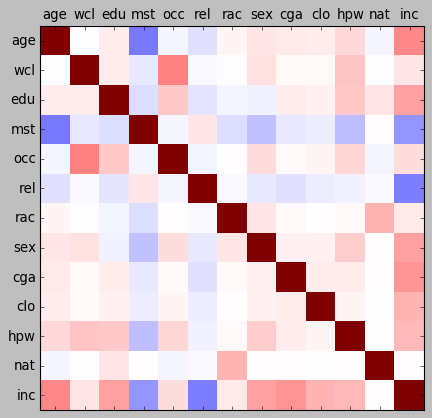

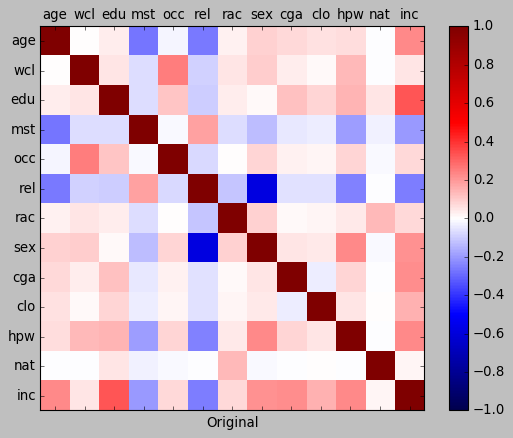

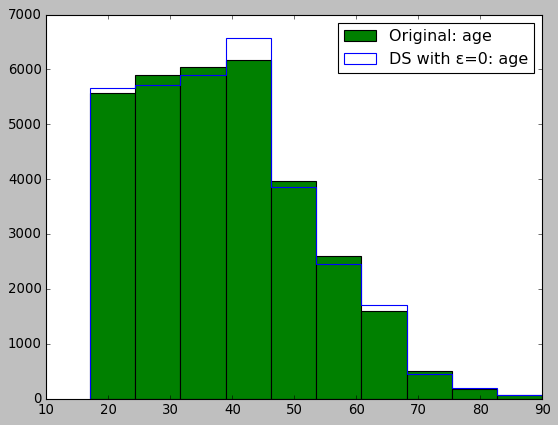

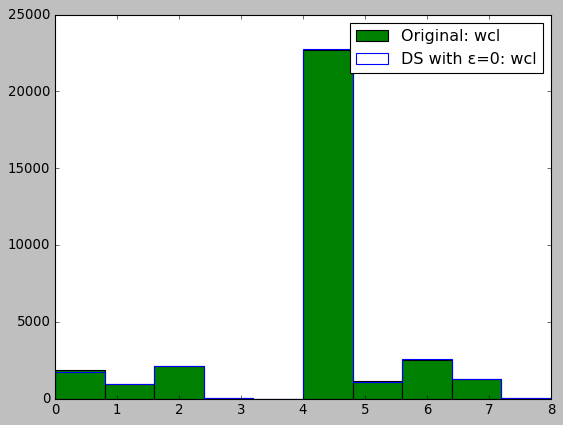

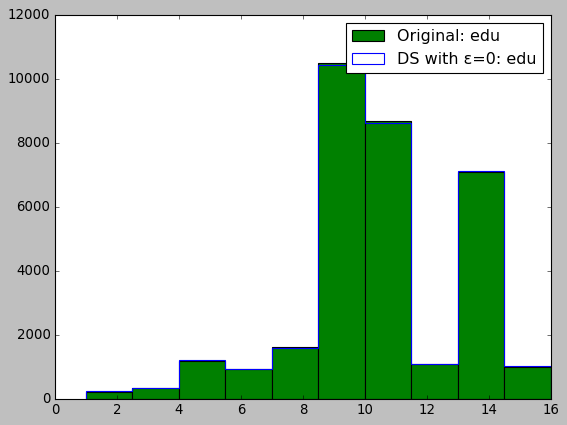

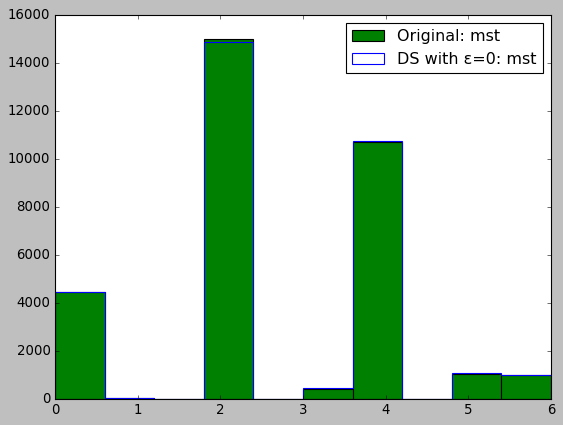

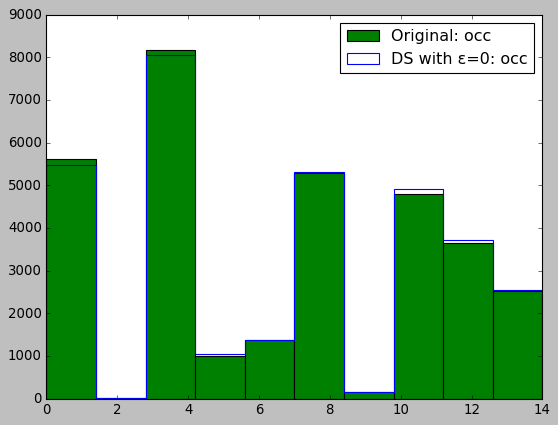

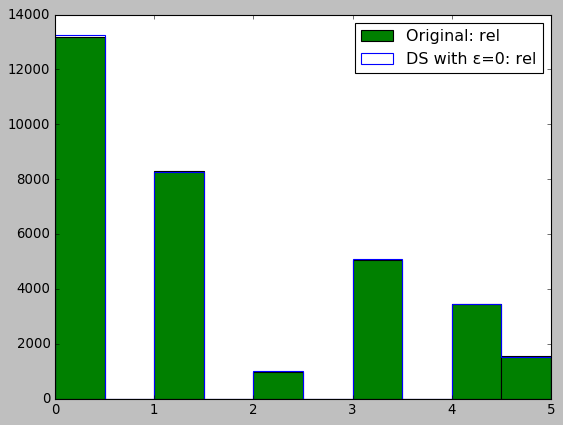

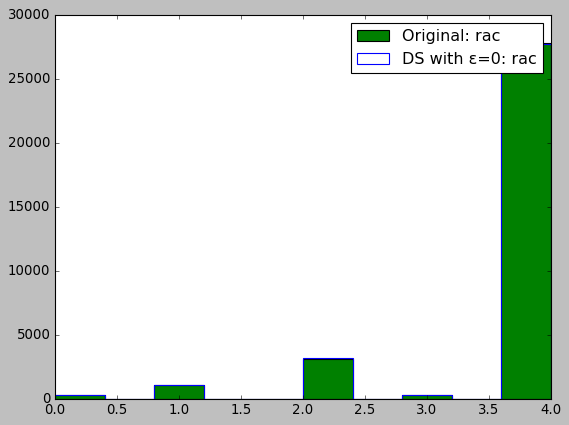

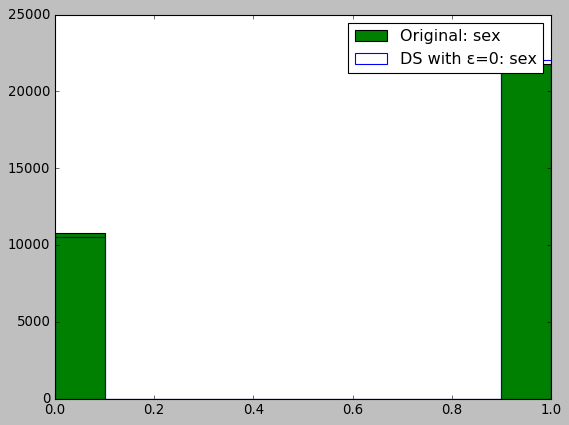

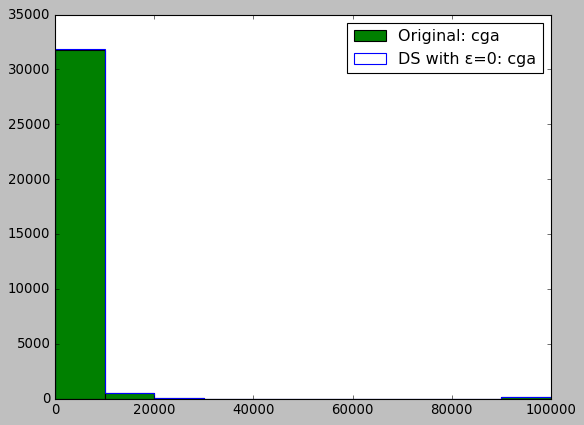

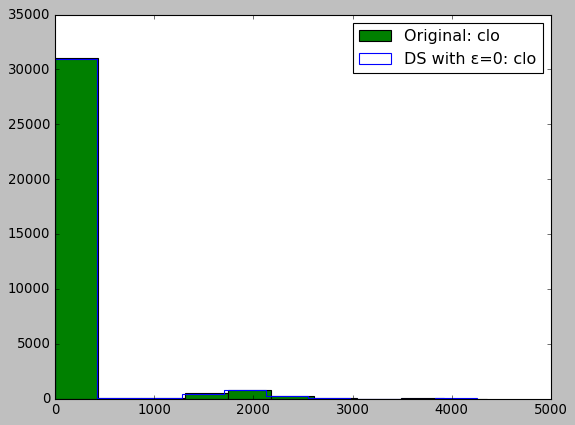

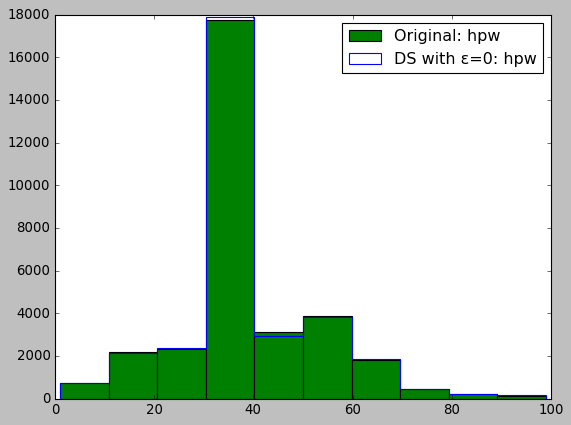

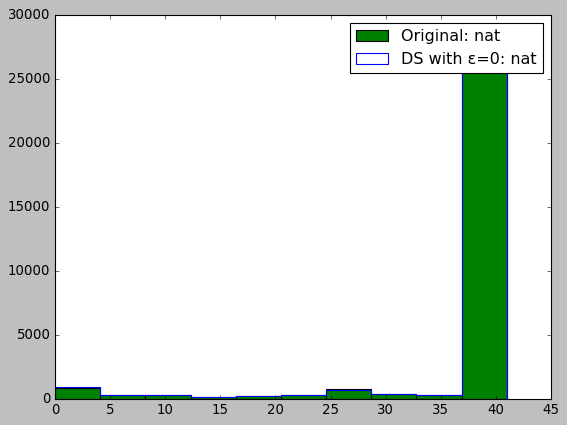

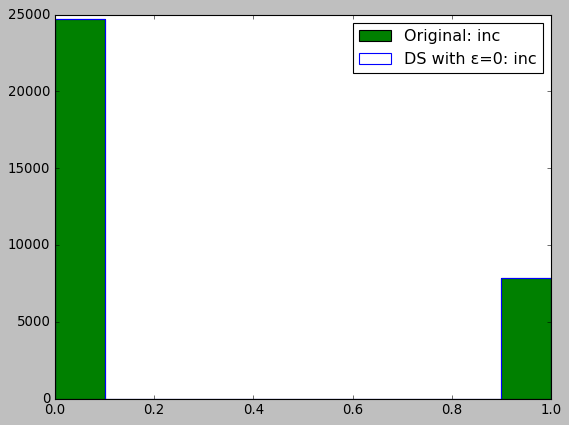

In [4]:
output = True
if output:
            textf = os.path.join(output_dir, 'k_'+str(degree_of_bayesian_network)+'_epochs_'+str(400)+'.txt')
            with open(textf, 'w') as w:
                w.write("================"+'\n'+
                        "Runtime Data Description: "+str(bn_time)+'\n'+
                        "Fitness: "+str(fitness)+'\n'+
                        "Runtime Data Generation: "+str(gen_time)+'\n'
                        )

            syn_df = pd.read_csv(synthetic_data)

            # Label Encoding
            header = list(input_df.columns.values)

            for i in range(len(header)):

                if header[i] in ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']:
                    input_df.iloc[:,i]=le.fit_transform(list(input_df.iloc[:,i])).astype(float)
                    syn_df.iloc[:,i]=le.fit_transform(list(syn_df.iloc[:,i])).astype(float)

            header= ['age', 'wcl', 'edu', 'mst', 'occ', 'rel', 'rac', 'sex', 'cga', 'clo', 'hpw', 'nat', 'inc']
            correlations_syn = syn_df.corr()
            fig = plt.figure()
            ax = fig.add_subplot(1,1,1)
            cax = ax.matshow(correlations_syn, cmap='seismic', vmin=-1, vmax=1)
            ticks = np.arange(0,len(header),1)
            ax.set_xticks(ticks)
            ax.set_yticks(ticks)
            ax.set_xticklabels(header)
            ax.set_yticklabels(header)
            #ax.set_xlabel("DataSynthesizer with \u03B5="+str(diff))
            plt.savefig(output_dir+'heatsyn_custom_rel.png', bbox_inches='tight')
            plt.show()

            correlations_real = input_df.corr()
            fig = plt.figure()
            ax = fig.add_subplot(1,1,1)
            cax = ax.matshow(correlations_real, cmap='seismic', vmin=-1, vmax=1)
            fig.colorbar(cax)
            ticks = np.arange(0,len(header),1)
            ax.set_xticks(ticks)
            ax.set_yticks(ticks)
            ax.set_xticklabels(header)
            ax.set_yticklabels(header)
            ax.set_xlabel("Original")
            plt.savefig(output_dir+'heatreal.png', bbox_inches='tight')
            plt.show()

            for i in range(len(header)):
                plt.hist(input_df.iloc[:,i], color='green', label='Original: '+header[i])
                plt.legend()
                plt.hist(syn_df.iloc[:,i],histtype='step', color='blue', label='DS with \u03B5='+str(diff)+': '+header[i])
                plt.legend()
                plt.savefig(output_dir+'histograms/'+header[i]+'.png', bbox_inches='tight')
                plt.show()